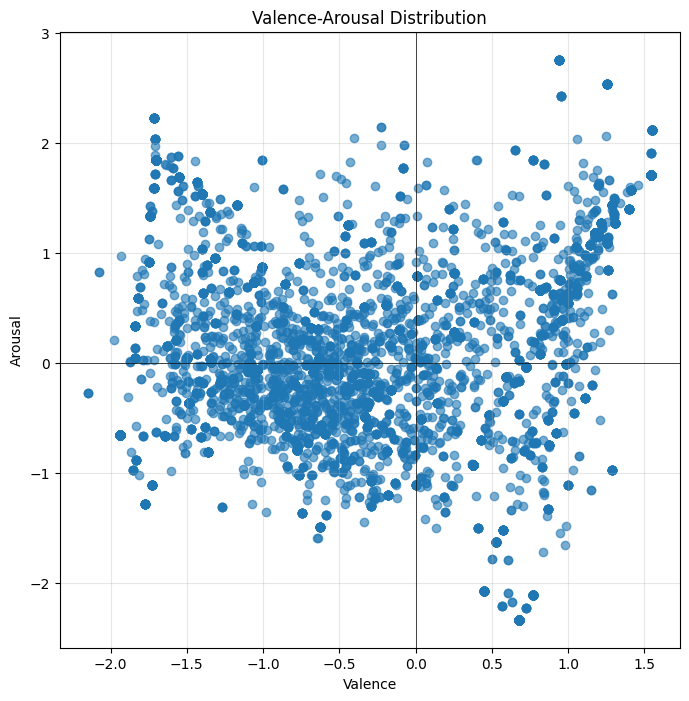

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Your training data
datafile = pd.read_csv("data/deezer_mdd/train.csv")
valence = datafile['valence'].values
arousal = datafile['arousal'].values

plt.figure(figsize=(8, 8))
plt.scatter(valence, arousal, alpha=0.6)
plt.xlabel('Valence')
plt.ylabel('Arousal')
plt.title('Valence-Arousal Distribution')
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='k', linewidth=0.5)
plt.axvline(x=0, color='k', linewidth=0.5)
plt.show()

## VGGish pretrained project and data

(1802, 128)
(1802, 2)
[3.1 3. ]


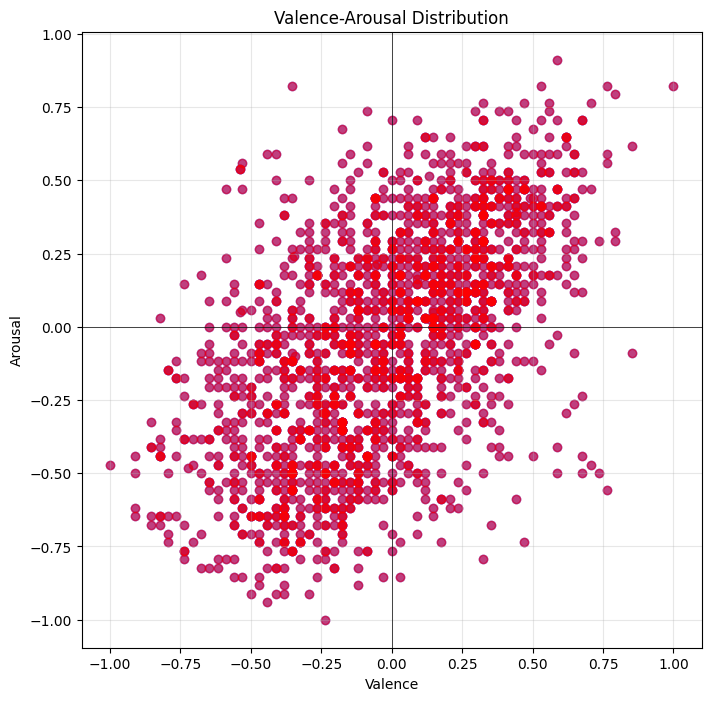

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load files
features = np.load('deam_processed/vggish_features.npy')
labels = np.array(np.load('deam_processed/labels.npy'))
y_val = np.array(np.load('deam_processed/splits/y_val.npy'))

a, b = -1, 1
normalizedLabels = a + (labels - labels.min()) * (b - a) / (labels.max() - labels.min())

normalizedTrueValidationLabels = a + (labels - labels.min()) * (b - a) / (labels.max() - labels.min())

print(features.shape)
print(labels.shape)
print(labels[0])

plt.figure(figsize=(8, 8))
plt.scatter(normalizedLabels[:, 0], normalizedLabels[:, 1], alpha=0.5, color='b')
plt.scatter(normalizedTrueValidationLabels[:, 0], normalizedTrueValidationLabels[:, 1], alpha=0.5, color='r')
plt.xlabel('Valence')
plt.ylabel('Arousal')
plt.title('Valence-Arousal Distribution')
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='k', linewidth=0.5)
plt.axvline(x=0, color='k', linewidth=0.5)
plt.show()

### Data inspection

#### deam splits.
Contain N by 128 song related features from VGGish.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp

X_train = np.load('deam_processed/splits/X_train.npy')
X_val = np.load('deam_processed/splits/X_val.npy')
X_test = np.load('deam_processed/splits/X_test.npy')

print('basic stats on the training data')
print(X_train.shape)
print(X_val.shape)
for num in range(0, 5):
    print(X_train[num][0], X_train[num][127])

statistics, p_value = ks_2samp(X_train, X_val, axis=0)
p_value = np.array(p_value)
if np.any(p_value < 0.05):
    print('caution, covariant shift detected')
print(f"Min p-value: {p_value.min():.4f}")
print(f"Max p-value: {p_value.max():.4f}")
print(f"Median p-value: {np.median(p_value):.4f}")
print(f"Features with p < 0.05: {np.sum(p_value < 0.05)}")
print(f"Features with p < 0.01: {np.sum(p_value < 0.01)}")

print('p_value.shape', p_value.shape)

basic stats on the training data
(1261, 128)
(270, 128)
-0.538321 0.0024122887
-0.7861935 -0.012234002
-0.77457005 0.19659711
-0.7978161 0.3923484
-0.72754633 0.20305029
caution, covariant shift detected
Min p-value: 0.0043
Max p-value: 0.9767
Median p-value: 0.4196
Features with p < 0.05: 7
Features with p < 0.01: 1
p_value.shape (128,)
